# Graph Theory - Tutorial
### DSC 190 - Instructor: Gal Mishne, gmishne@ucsd.edu

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Create an empty graph with no nodes and no edges.



In [2]:
G = nx.Graph()

By definition, a *Graph* is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). 

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats.

 ## Nodes
 You can add one node at a time,


In [3]:
G.add_node(1)
print(G.nodes())

[1]


or add nodes from any iterable container, such as a list


In [4]:
G.add_nodes_from([2, 3])
print(G.nodes())

[1, 2, 3]


You can also add nodes along with node attributes if your container yields 2-tuples of the form (node, node_attribute_dict):


In [5]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [6]:
print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))

[1, 2, 3, 4, 5]
[]
<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


## Edges
G can also be grown by adding one edge at a time,

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [8]:
G.add_edges_from([(1, 4), (1, 3)])

In [9]:
print(G.edges())


[(1, 2), (1, 4), (1, 3), (2, 3)]


## Graph generator

Create a path graph with 10 nodes

In [10]:
H = nx.path_graph(10)
print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges of graph: 
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


Let's plot it

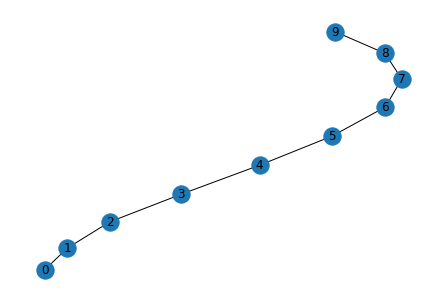

In [11]:
pos = nx.spring_layout(H) # calculate position of nodes
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos) # add node labels
plt.show()

## Merging graphs
Nodes and edges from one graph can be incorporated into another:

In [12]:
G.add_nodes_from(H)
G.add_edges_from(H.edges)


G now contains the nodes of H as nodes of G. 



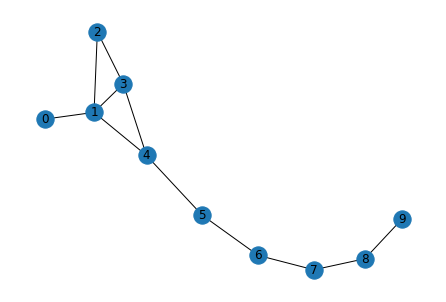

In [13]:
pos = nx.spring_layout(G) # calculate position of nodes
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos) # add node labels
plt.show()

In contrast, you could use the graph H as a node in G.


In [14]:
G.add_node(H)
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
[1, 2, 3, 4, 5, 0, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f29b4a0fc50>]
Edges of graph: 
[(1, 2), (1, 4), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. 

## Graph matrices 

The following commnad returns the adjacency matrix of G as a scipy sparse array.



In [15]:
A = nx.adjacency_matrix(H)

In [16]:
print(A) 

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (8, 7)	1
  (8, 9)	1
  (9, 8)	1


We can plot the sparse matrix

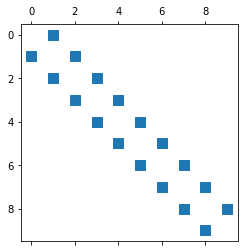

In [17]:
plt.spy(A)
plt.show()

## Graph drawing

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

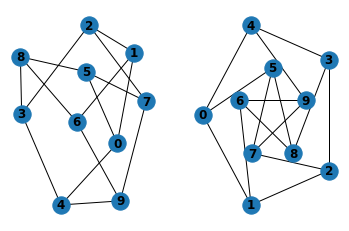

In [27]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

Let's test out various graph drawing methods

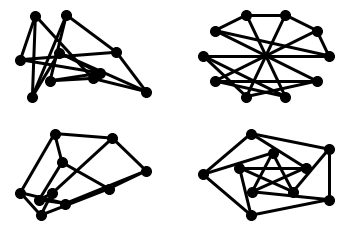

In [28]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

### Spectral graph drawing

Zachary's Karate Club (ZKC) is perhaps the most well known example in social network anlaysis. It was introduced by Wayne Zachary in 1977 and has been a popular example ever since.

The network models the relationships between 34 members of a karate club: each node represents to an individual, and the links/edges represent individuals who interact outside of the karate club setting (e.g. spending social time together, like meeting up for a coffee, seperate to karate).

The network has two main players the 'Officer' - John A (node 33) and the instructor - Mr. Hi (node 0). And the story goes that a rift occurred between Mr Hi and John A, causing the karate club to splinter into two new clubs (or factions). One club lead by John A and the other led by Mr Hi.

One might expect that each member's decision to join either faction would be driven by their relationships with the other members of the club. So if we have a model of the relationships between the individuals (i.e. the network) we should be able to predict with faction each person will join. As you will see, network analysis gives us the power to do just that!

In [29]:
#Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

In [30]:
#Let's convert the labels of which club each member ended up joining into colors

(faction1_col, faction2_col) = ('lightgreen','pink')

node_color = [faction1_col] * len(ZKC_graph.nodes())
# Now using the faction membership abnnotations from Zachary's data, change the known faction2 nodes to faction2_color.

node_dict = dict(ZKC_graph.nodes(data=True))
for n in ZKC_graph.nodes():
    if node_dict[n]['club'] == 'Officer':
        node_color[n] = faction2_col
        
node_color[0] = 'green'
node_color[33] = 'red'

Let's plot the graph, we see the social network structure indeed maps onto which club which individual joined

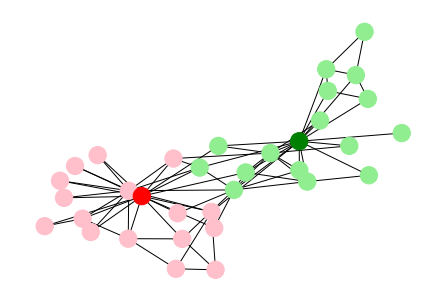

In [31]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G) # calculate position of nodes
nx.draw(G,pos,node_color=node_color)
plt.show()